# Bangalore trees 

Trying out an image classification algorithm to identify trees in Bangalore. Got the dataset from https://github.com/ramanarunachalam/Flora-and-Fauna/tree/master/Flora

In [7]:
%matplotlib inline

import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fastai import *
from fastai.vision import *

In [8]:
PATH = "/home/sairahul/myfiles/fastai_v1/notebooks/Flora-and-Fauna/Flora/"

In [19]:
def get_training_set():
    os.chdir(PATH)
    images = glob.glob("*/*.jpg")
    image_path = []
    label = []
    for image in images:
        label.append(os.path.dirname(image))
        image_path.append(image)
    
    return pd.DataFrame({'name': image_path, 'label': label})

In [27]:
df = get_training_set()
# Shuffles the dataset
df.sample(frac=1)

tfms = get_transforms()
data = ImageDataBunch.from_df(path=PATH, df=df, ds_tfms=tfms, size=128)
learn = create_cnn(data, models.resnet34, metrics=accuracy)

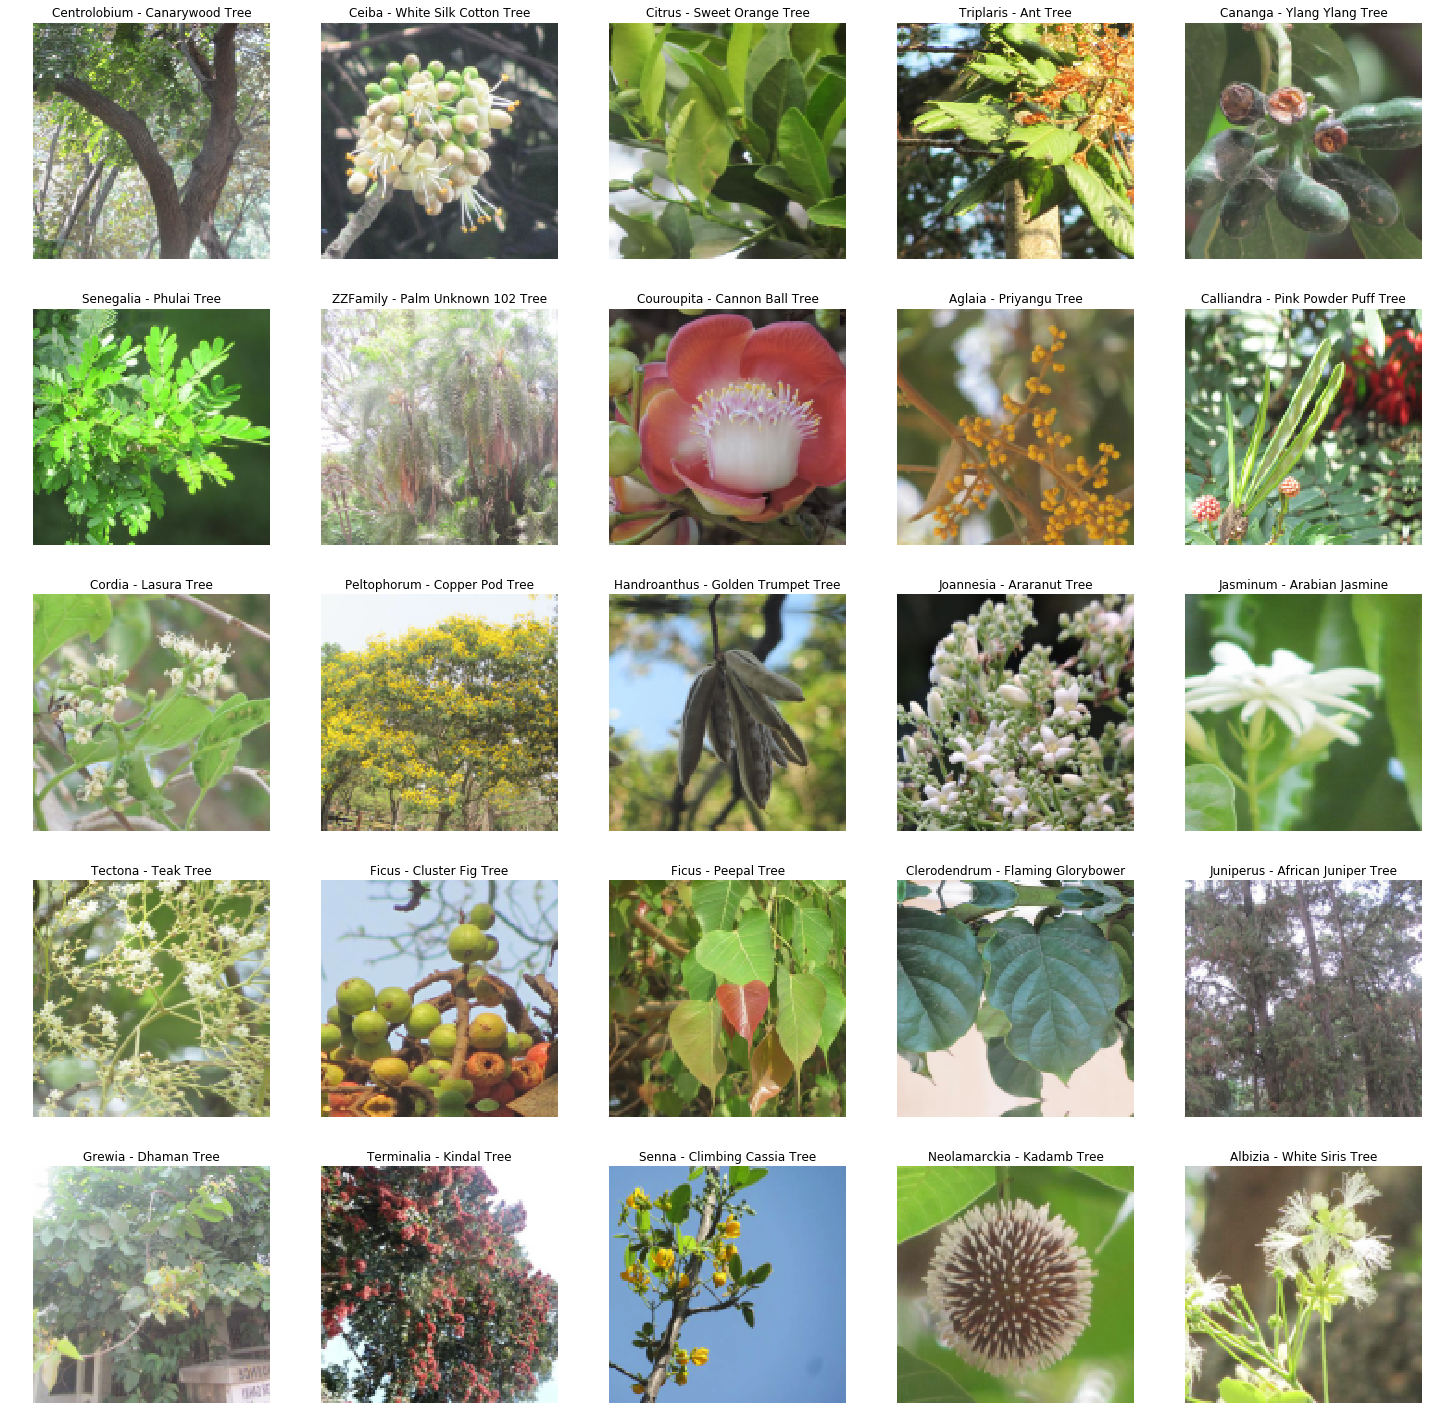

In [32]:
data.show_batch(rows=5)

In [28]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,5.976400,5.579669,0.076721


In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


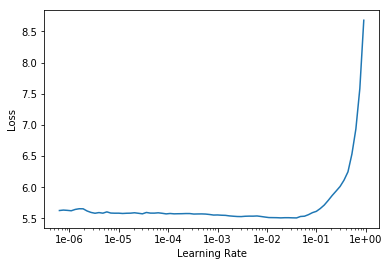

In [30]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-2))

epoch,train_loss,valid_loss,accuracy
1,5.317080,5.114880,0.104262
2,5.058317,4.651845,0.147869
3,4.465743,4.317078,0.202623
4,3.856898,4.087245,0.240984
5,3.435255,4.036532,0.249508


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


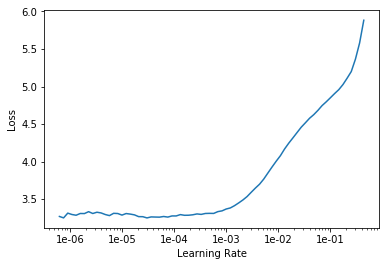

In [33]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(5, max_lr=slice(5e-6, 5e-4))

epoch,train_loss,valid_loss,accuracy
1,3.279335,3.952476,0.263279
2,3.179415,3.785996,0.292131
3,2.849237,3.672250,0.305902
4,2.571089,3.615027,0.317377
5,2.485261,3.605540,0.318361


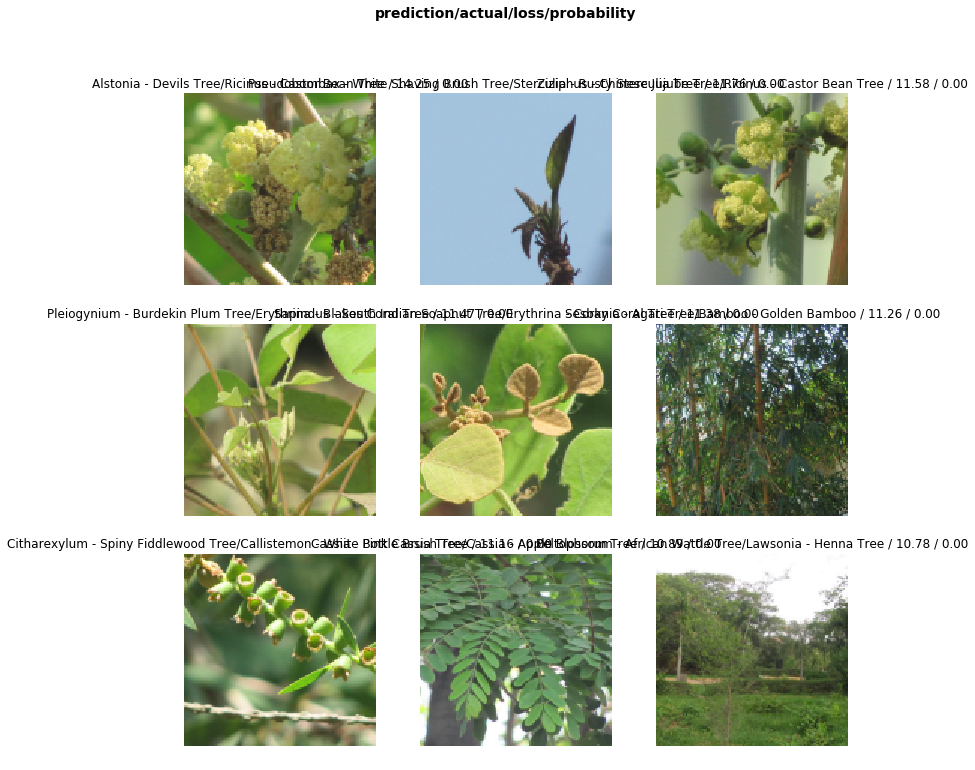

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9)